<a href="https://colab.research.google.com/github/ghassenov/ML-notebooks/blob/main/Regression_%26_optimisation_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Models

Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = 2*np.random.rand(100,1)
y = 4 + 3*X+np.random.randn(100,1)

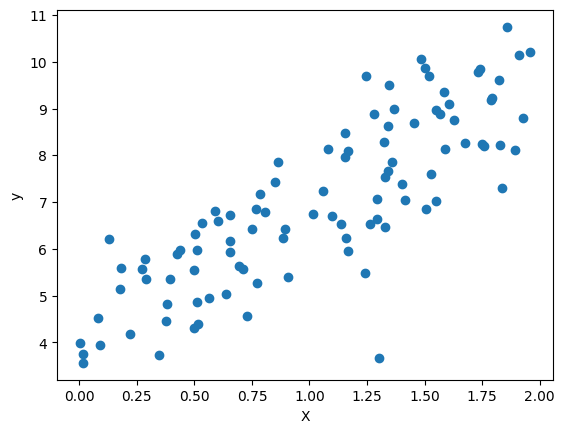

In [5]:
plt.figure()
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

now let's compute θ using the normal Equation
* we will use inv() from np.linalg to compute the inverse of a matrix and dot() formatrix multiplication

In [6]:
X_b = np.c_[np.ones((100,1)),X] #adds x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.18857566],
       [2.6970588 ]])

we would have hoped for θ0 = 4 and θ1 = 3. Close enough, the noise made it impossible to recover the exact parameters of the original function

In [8]:
# now we can make predictions using theta_best
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.18857566],
       [9.58269326]])

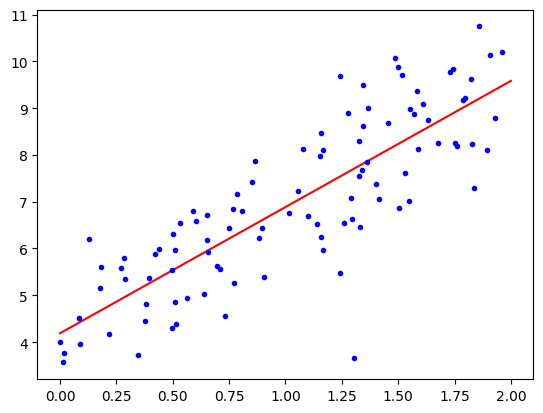

In [9]:
# we plot the model's predictions
plt.plot(X_new,y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

Performing linear regression using scikit learn

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.18857566]), array([[2.6970588]]))

In [11]:
lin_reg.predict(X_new)

array([[4.18857566],
       [9.58269326]])

The LinearRegression class is based on the scipy.linalg.lstq() function

In [12]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.18857566],
       [2.6970588 ]])

The function computes θ=X'y where X' is the pseudo inverse of X (Moore-Penrose inverse) we can use np.linalg.pinv() to compute it directly

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.18857566],
       [2.6970588 ]])

the method above is more efficient that computing the Normal equation (it uses SVD (singular value decomposition) that decomposes X into the matrix multiplication of three matrices U Σ VT), plus it handles edge cases nicely: indeed, the normal equation may not work if the matrix tX.X is not invertible,such as if m < n or if some features are redundant.

Computational Complexity
* Normal Equation: inverting the tX.X takes roughly O(n^3) (depending on the implementaion) where n is the number of features.  

* The SVD approach is about O(n^2)
* but Both get very slow when the number of features grows large

Gradient Descent:
* Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

* Concretely, you start by filling θ with random values (this is called random initializa‐
tion), and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum
* An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time
* On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution

Problems That we may encounter with GD:
* two main challenges with Gradient Descent: if the ran‐
dom initialization starts the algorithm on the left, then it will converge to a local mini‐
mum, which is not as good as the global minimum. If it starts on the right, then it will
take a very long time to cross the plateau, and if you stop too early you will never
reach the global minimum.

Note :
*  When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge
* the more parameters a model has,
the more dimensions this space has, and the harder the search is

Batch Gradient Descent:

In [29]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #random initialization
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta -eta*gradients

theta

array([[4.18857566],
       [2.6970588 ]])

Stochastic gradient descent:
* The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance
* On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on aver
age. Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down
* When the cost function is very irregular, this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.
* Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum.
* The function that determines the learning rate at each
iteration is called the learning schedule

In [30]:
n_epochs = 50
t0,t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0/(t+t1)
theta = np.random.randn(2,1) #random initialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[4.22064361],
       [2.65145647]])